   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 92.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 78.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.9/82.9 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.8 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully uninstalled tenacity-9.0.0


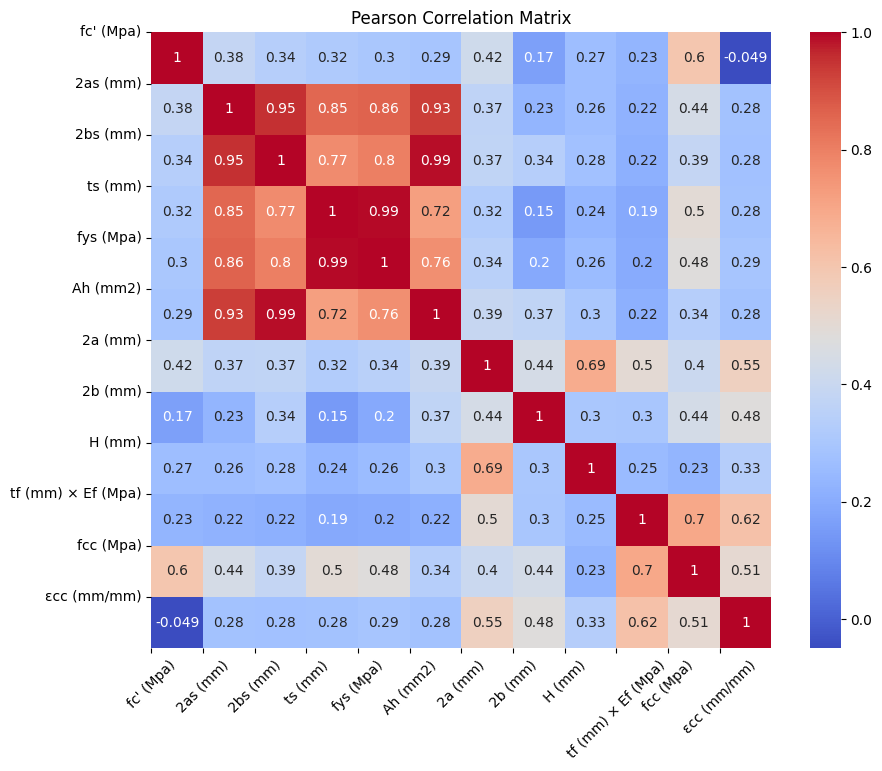

[[32.64 0 0 ... 41382 40.21 0.0101]
 [32.64 0 0 ... 41382 43.73 0.0147]
 [32.64 0 0 ... 41382 40.52 0.0119]
 ...
 [50.4 180 90 ... 168209.99999999997 78.78 0.0218]
 [50.4 180 120 ... 84104.99999999999 73.24 0.0131]
 [50.4 180 120 ... 168209.99999999997 65.6 0.022400000000000003]]


In [1]:
# prompt: import excel file in to pandas  file '/content/DataForMLModelsTopic-30.xlsx'   collect third row as annotation
# and remove 3 rows in df then plot pear son correlation of all variable and put  annotation  of graph
# convert to nparray
!pip install streamlit
!pip install openpyxl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Read the Excel file
df = pd.read_excel('/content/DatabaseTopic46.xlsx')

# Collect the third row as annotation
annotation = df.iloc[1].tolist()

# Remove the first 3 rows
df = df.iloc[3:]

# Calculate Pearson correlation
correlation_matrix = df.corr(method='pearson')

# Plot the correlation matrix with annotations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Pearson Correlation Matrix')
plt.xticks(ticks=np.arange(len(annotation)), labels=annotation, rotation=45)
plt.yticks(ticks=np.arange(len(annotation)), labels=annotation)
plt.show()

# Convert the DataFrame to a NumPy array
data_array = df.to_numpy()
print(data_array)


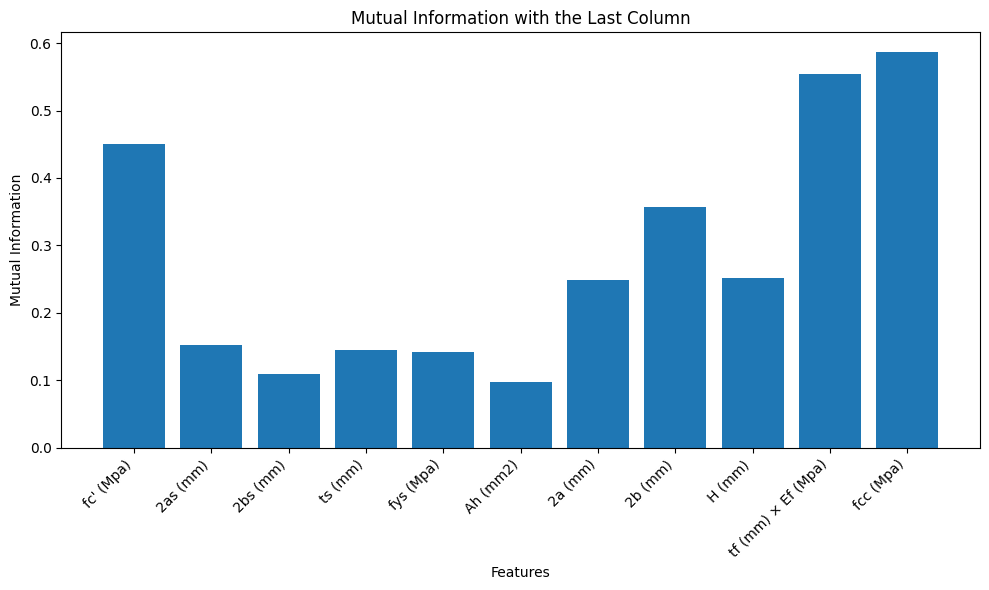

In [3]:
# prompt: import /content/DataForMLModelsTopic-30.xlsx  annotation is on the  second row of DF drop 3 row  find the mutual information to the last column of DF  Y is the last column
# plot Bar chart

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_regression # Use mutual_info_regression for continuous target

# Read the Excel file
df = pd.read_excel('/content/DatabaseTopic46.xlsx')

# Collect the second row as annotation
annotation = df.iloc[1].tolist()

# Remove the first 3 rows
df = df.iloc[3:]

# Separate features (X) and target variable (Y)
X = df.iloc[:, :-1]
Y = df.iloc[:, -1]

# Calculate mutual information for regression
mi_scores = mutual_info_regression(X, Y) # Changed to mutual_info_regression

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(annotation[:-1], mi_scores)  # Exclude the last annotation for Y
plt.xlabel('Features')
plt.ylabel('Mutual Information')
plt.title('Mutual Information with the Last Column')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Epoch 1/100, Train Loss: 0.3081, Validation Loss: 0.2658
Epoch 2/100, Train Loss: 0.2390, Validation Loss: 0.2094
Epoch 3/100, Train Loss: 0.1812, Validation Loss: 0.1612
Epoch 4/100, Train Loss: 0.1309, Validation Loss: 0.1203
Epoch 5/100, Train Loss: 0.0895, Validation Loss: 0.0869
Epoch 6/100, Train Loss: 0.0573, Validation Loss: 0.0624
Epoch 7/100, Train Loss: 0.0362, Validation Loss: 0.0483
Epoch 8/100, Train Loss: 0.0248, Validation Loss: 0.0443
Epoch 9/100, Train Loss: 0.0230, Validation Loss: 0.0457
Epoch 10/100, Train Loss: 0.0238, Validation Loss: 0.0459
Epoch 11/100, Train Loss: 0.0228, Validation Loss: 0.0438
Epoch 12/100, Train Loss: 0.0207, Validation Loss: 0.0416
Epoch 13/100, Train Loss: 0.0187, Validation Loss: 0.0398
Epoch 14/100, Train Loss: 0.0179, Validation Loss: 0.0384
Epoch 15/100, Train Loss: 0.0171, Validation Loss: 0.0374
Epoch 16/100, Train Loss: 0.0163, Validation Loss: 0.0366
Epoch 17/100, Train Loss: 0.0154, Validation Loss: 0.0364
Epoch 18/100, Train Los

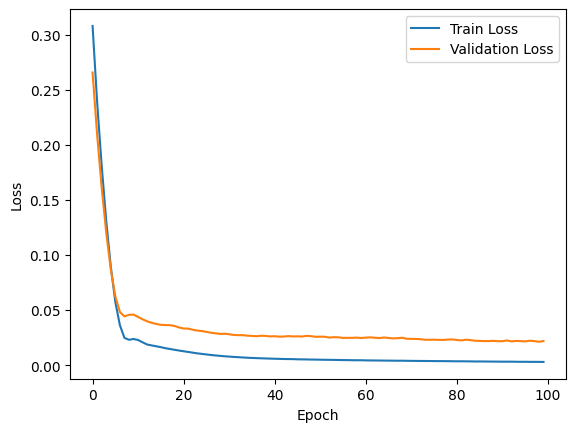

Mean Absolute Percentage Error (MAPE) on Test Set: 7.50%


In [4]:
# prompt: # prompt: Normalize value of X and Y
# Y is the 2 last column of data  -predict 2 value
# # Split X and Y in to train 0.8 test 0.1 and val 0.1
# # create MLP using python torch 3 layers to predict Y value show val loss
# # plot  train loss and val loss 2 line together
# # show error matrix is  MAPE of test sample after finish

import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset

# Normalize X and Y (last two columns)
scaler_X = MinMaxScaler()
X_normalized = scaler_X.fit_transform(X)

scaler_Y = MinMaxScaler()
Y_normalized = scaler_Y.fit_transform(df.iloc[:, -2:].values)  # Normalize the last two columns

# Split data into train, validation, and test sets
X_train, X_temp, Y_train, Y_temp = train_test_split(
    X_normalized, Y_normalized, test_size=0.2, random_state=42
)
X_val, X_test, Y_val, Y_test = train_test_split(
    X_temp, Y_temp, test_size=0.5, random_state=42
)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
Y_train_tensor = torch.tensor(Y_train, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
Y_val_tensor = torch.tensor(Y_val, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
Y_test_tensor = torch.tensor(Y_test, dtype=torch.float32)

# Create DataLoader
train_dataset = TensorDataset(X_train_tensor, Y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_dataset = TensorDataset(X_val_tensor, Y_val_tensor)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# Define the MLP model
class MLP(nn.Module):
    def __init__(self, input_size, output_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, output_size)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize the model, loss function, and optimizer
input_size = X_train.shape[1]
output_size = Y_train.shape[1]  # Predict two values
model = MLP(input_size, output_size)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 100
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    # Training
    model.train()
    train_loss = 0.0
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * inputs.size(0)
    train_loss /= len(train_loader.dataset)
    train_losses.append(train_loss)

    # Validation
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for inputs, targets in val_loader:
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            val_loss += loss.item() * inputs.size(0)
    val_loss /= len(val_loader.dataset)
    val_losses.append(val_loss)

    print(
        f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}"
    )

# Plot train and validation losses
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Evaluation on test set (MAPE)
model.eval()
with torch.no_grad():
    y_pred = model(X_test_tensor)
    mape = torch.mean(torch.abs((Y_test_tensor - y_pred) / Y_test_tensor)) * 100
    print(f"Mean Absolute Percentage Error (MAPE) on Test Set: {mape:.2f}%")


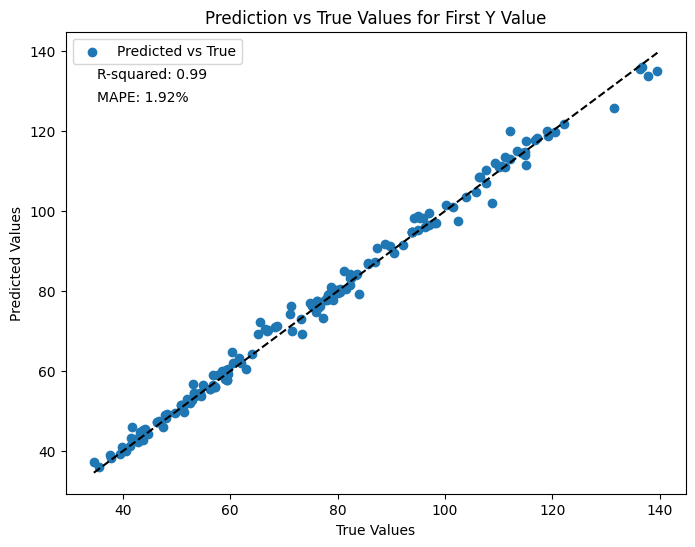

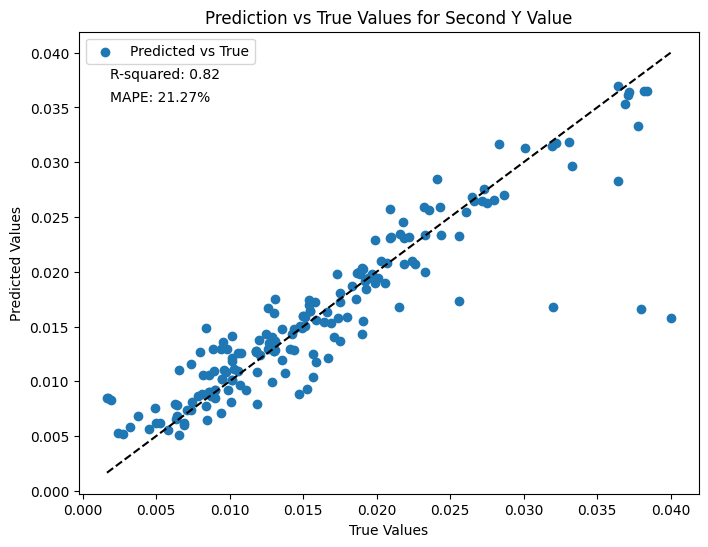

In [8]:
# prompt: # prompt: plot the predicted and all data use the all data and find R2 and insert on curve
# PLot 2 graph for the first value  of Y and the second value of Y
# # also plot line 45 degree
# # calculate MAPE and insert on graph
# # text must below annotation

import matplotlib.pyplot as plt
import numpy as np
# Predict on all data
model.eval()
with torch.no_grad():
    all_predictions = model(torch.tensor(X_normalized, dtype=torch.float32))

# Invert normalization to get predictions in original scale
all_predictions_original_scale = scaler_Y.inverse_transform(all_predictions.numpy())

# Extract the two predicted values
predicted_value1 = all_predictions_original_scale[:, 0]
predicted_value2 = all_predictions_original_scale[:, 1]

# Extract the true values
true_value1 = df.iloc[:, -2].values
true_value2 = df.iloc[:, -1].values

# Calculate R-squared for both values
from sklearn.metrics import r2_score
r2_value1 = r2_score(true_value1, predicted_value1)
r2_value2 = r2_score(true_value2, predicted_value2)

# Calculate MAPE for both values
mape_value1 = np.mean(np.abs((true_value1 - predicted_value1) / true_value1)) * 100
mape_value2 = np.mean(np.abs((true_value2 - predicted_value2) / true_value2)) * 100

# Plot the results for the first value of Y
plt.figure(figsize=(8, 6))
plt.scatter(true_value1, predicted_value1, label='Predicted vs True')
plt.plot([min(true_value1), max(true_value1)], [min(true_value1), max(true_value1)], 'k--')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Prediction vs True Values for First Y Value')
plt.text(0.05, 0.9, f'R-squared: {r2_value1:.2f}', transform=plt.gca().transAxes)
plt.text(0.05, 0.85, f'MAPE: {mape_value1:.2f}%', transform=plt.gca().transAxes)
plt.legend()
plt.show()

# Plot the results for the second value of Y
plt.figure(figsize=(8, 6))
plt.scatter(true_value2, predicted_value2, label='Predicted vs True')
plt.plot([min(true_value2), max(true_value2)], [min(true_value2), max(true_value2)], 'k--')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Prediction vs True Values for Second Y Value')
plt.text(0.05, 0.9, f'R-squared: {r2_value2:.2f}', transform=plt.gca().transAxes)
plt.text(0.05, 0.85, f'MAPE: {mape_value2:.2f}%', transform=plt.gca().transAxes)
plt.legend()
plt.show()


In [ ]:
# prompt: save model weight and model normalize and then create inference app let used input value in streamlit

# Save model weights
torch.save(model.state_dict(), 'mlp_model.pth')

# Save MinMaxScaler objects (for normalization)
import joblib
joblib.dump(scaler_X, 'scaler_X.pkl')
joblib.dump(scaler_Y, 'scaler_Y.pkl')






['scaler_Y.pkl']

In [ ]:
%%writefile app.py
import streamlit as st
import torch
import torch.nn as nn
import joblib
import numpy as np

# Load the saved model and scalers
model = MLP(input_size, hidden_size1, hidden_size2, output_size)  # Re-define your MLP class here
model.load_state_dict(torch.load('mlp_model.pth'))
model.eval()  # Set the model to evaluation mode

scaler_X = joblib.load('scaler_X.pkl')
scaler_Y = joblib.load('scaler_Y.pkl')

# Streamlit app
st.title('Inference App')

# Input fields for features
input_features = []
for i in range(input_size):
    feature_value = st.number_input(f"Feature {i+1}", value=0.0)
    input_features.append(feature_value)

# Predict button
if st.button('Predict'):
    # Convert input features to a NumPy array and normalize
    input_array = np.array(input_features).reshape(1, -1)
    input_normalized = scaler_X.transform(input_array)

    # Convert to PyTorch tensor and make prediction
    input_tensor = torch.tensor(input_normalized, dtype=torch.float32)
    with torch.no_grad():
        prediction_normalized = model(input_tensor)

    # Inverse transform the prediction to the original scale
    prediction = scaler_Y.inverse_transform(prediction_normalized.numpy())[0][0]

    # Display prediction
    st.success(f"Predicted Value: {prediction:.2f}")

!streamlit run app.py

Writing app.py


In [ ]:
!npm install localtunnel


added 22 packages, and audited 23 packages in 7s

3 packages are looking for funding
  run `npm fund` for details

2 moderate severity vulnerabilities

To address all issues, run:
  npm audit fix

Run `npm audit` for details.


In [ ]:
!streamlit run app.py &>/content/logs.txt &

In [ ]:
import urllib
print("Password/Enpoint IP for localtunnel is:",urllib.request.urlopen('https://ipv4.icanhazip.com').read().decode('utf8').strip("\n"))

Password/Enpoint IP for localtunnel is: 104.199.158.128


In [ ]:
!npx localtunnel --port 8501

your url is: https://silly-impalas-carry.loca.lt
^C


In [ ]:
# prompt: Normalize value of X and Y
# Split X and Y in to train 0.8 test 0.1 and val 0.1
# create XGboost using python torch  to predict Y value show val loss
# plot  train loss and val loss 2 line together
# show error matrix is  MAPE of test sample after finish

import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.metrics import mean_absolute_percentage_error

# Normalize X and Y
scaler_X = MinMaxScaler()
X_normalized = scaler_X.fit_transform(X)

scaler_Y = MinMaxScaler()
Y_normalized = scaler_Y.fit_transform(Y.values.reshape(-1, 1))

# Split data into train, test, and validation sets
X_train, X_temp, Y_train, Y_temp = train_test_split(
    X_normalized, Y_normalized, test_size=0.2, random_state=42
)
X_val, X_test, Y_val, Y_test = train_test_split(
    X_temp, Y_temp, test_size=0.5, random_state=42
)

# Convert to XGBoost DMatrix
dtrain = xgb.DMatrix(X_train, label=Y_train)
dval = xgb.DMatrix(X_val, label=Y_val)
dtest = xgb.DMatrix(X_test, label=Y_test)

# Set XGBoost parameters
params = {
    'objective': 'reg:squarederror',  # Regression task
    'eval_metric': 'mae',  # Mean absolute error for evaluation
    'eta': 0.1,  # Learning rate
    'max_depth': 3,  # Maximum depth of trees
}

# Train XGBoost model
num_rounds = 100
evallist = [(dval, 'eval')]
evals_result = {}
bst = xgb.train(params, dtrain, num_rounds, evallist, evals_result=evals_result, verbose_eval=10)



# Predict on test set and calculate MAPE
Y_pred = bst.predict(dtest)
Y_pred = scaler_Y.inverse_transform(Y_pred.reshape(-1, 1))  # Inverse transform to original scale
Y_test_original = scaler_Y.inverse_transform(Y_test)  # Inverse transform to original scale
mape = mean_absolute_percentage_error(Y_test_original, Y_pred) * 100
print(f"MAPE on Test Set: {mape:.2f}%")


[0]	eval-mae:0.15753
[10]	eval-mae:0.06565
[20]	eval-mae:0.02843
[30]	eval-mae:0.01749
[40]	eval-mae:0.01301
[50]	eval-mae:0.01109
[60]	eval-mae:0.01009
[70]	eval-mae:0.00962
[80]	eval-mae:0.00927
[90]	eval-mae:0.00895
[99]	eval-mae:0.00871
MAPE on Test Set: 4.21%


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
